### A series of attempts to answer Google-able questions with the power of python. 
I. What do harmonics look like for 

a. 'D' played in different octaves

b. 'D' played in same octave on different instruments

In [61]:
#!/usr/bin/env python
import sys
from pylab import *
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile # get the api
import pandas as pd

%matplotlib inline

In [3]:
# Sample width: 
#  Number of bytes required to represent value on storage medium.  This 
#  is a vertical quantity (eg ADCs); frame rate gives us horizontal (TDCs)
# Number of frames: 
#  Number of samples. For the example file, 
#  > 821659 samples / 44100 (samples/s) 
#  > 18.631723356009072 s
# => 1. / 44100 (samples/s) = 2.268E-5 s / sample

In [145]:
file_d4_p = 'Notes/D4_Piano.wav' 
wf_d4_p = wave.open(file_d4_p,'r')
wf_frames_d4_p = wf_d4_p.readframes(-1)
wf_frames_d4_p = fromstring(wf_frames_d4_p, 'Int16') # 89088 samples

file_d5_p = 'Notes/D5_Piano.wav' 
wf_d5_p = wave.open(file_d5_p,'r')
wf_frames_d5_p = wf_d5_p.readframes(-1)
wf_frames_d5_p = fromstring(wf_frames_d5_p, 'Int16') # 89088 samples

file_d6_p = 'Notes/D6_Piano.wav' 
wf_d6_p = wave.open(file_d6_p,'r')
wf_frames_d6_p = wf_d6_p.readframes(-1)
wf_frames_d6_p = fromstring(wf_frames_d6_p, 'Int16') # 89088 samples

file_d4_f = 'Notes/D4_Flute.wav' 
wf_d4_f = wave.open(file_d4_f,'r')
wf_frames_d4_f = wf_d4_f.readframes(-1)
wf_frames_d4_f = fromstring(wf_frames_d4_f, 'Int16') # 89088 samples

file_d5_f = 'Notes/D5_Flute.wav' 
wf_d5_f = wave.open(file_d5_f,'r')
wf_frames_d5_f = wf_d5_f.readframes(-1)
wf_frames_d5_f = fromstring(wf_frames_d5_f, 'Int16') # 89088 samples

file_d6_f = 'Notes/D6_Flute.wav' 
wf_d6_f = wave.open(file_d6_f,'r')
wf_frames_d6_f = wf_d6_f.readframes(-1)
wf_frames_d6_f = fromstring(wf_frames_d6_f, 'Int16') # 89088 samples

# I learned after viewing wfs that what I thought was D4 on guitar
# is actually D3, D5 is D4, etc
file_d4_g = 'Notes/D4_Guitar.wav' 
wf_d4_g = wave.open(file_d4_g,'r')
wf_frames_d4_g = wf_d4_g.readframes(-1)
wf_frames_d4_g = fromstring(wf_frames_d4_g, 'Int16') # 89088 samples

file_d5_g = 'Notes/D5_Guitar.wav' 
wf_d5_g = wave.open(file_d5_g,'r')
wf_frames_d5_g = wf_d5_g.readframes(-1)
wf_frames_d5_g = fromstring(wf_frames_d5_g, 'Int16') # 89088 samples

file_d6_g = 'Notes/D6_Guitar.wav' 
wf_d6_g = wave.open(file_d6_g,'r')
wf_frames_d6_g = wf_d6_g.readframes(-1)
wf_frames_d6_g = fromstring(wf_frames_d6_g, 'Int16') # 89088 samples

In [21]:
# Get FFT of waveform
# http://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html
def plotSpectrum(y,rate,color,name='Note_Instrument'):

    n = len(y) # number of samples
    k = arange(n)
    T = float(n) / rate # Total recorded time  
    frq = k / T 
    frq = frq[range(n/2)] 
    Y = fft(y) / n # fft and normalization
    Y = Y[range(n/2)]
  
    # Also draw a threshold value for peak finding
    #threshold = 30
    #x = np.arange(0,10000,10)
    #y = [ threshold for i in xrange(len(x)) ]

    plt.plot(frq,abs(Y),color,label="%s %s" % \
            (name.split('_')[1],name.split('_')[0]))
    #plt.plot(x,y,'k-',lw=2)
    plt.grid(True)
    plt.xlim(0.,4000)
    plt.yscale('log')
    plt.ylim(0.005,10000)
    plt.xlabel("Frequency []",fontsize=16)
    plt.ylabel("Amplitude [Arbitrary Units]",fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Freq Spectrum on a %s"%(name.split('_')[1]),fontsize=20)
    
    return frq, abs(Y)


(array([  0.00000000e+00,   5.00772166e-01,   1.00154433e+00, ...,
          2.20484977e+04,   2.20489985e+04,   2.20494992e+04]),
 array([ 0.12570403,  0.10334536,  0.08803003, ...,  0.03754925,
         0.02846942,  0.03964009]))

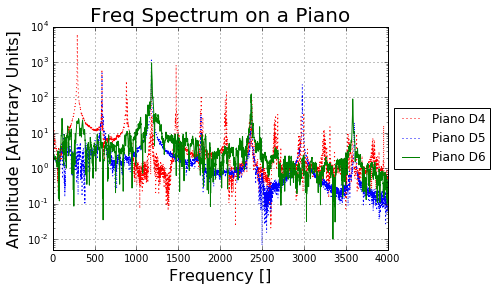

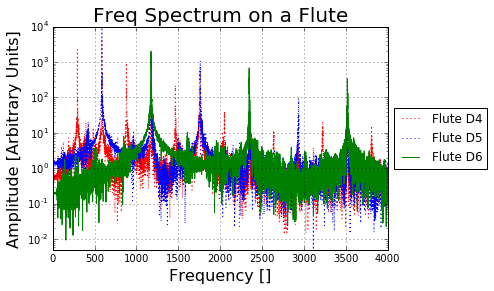

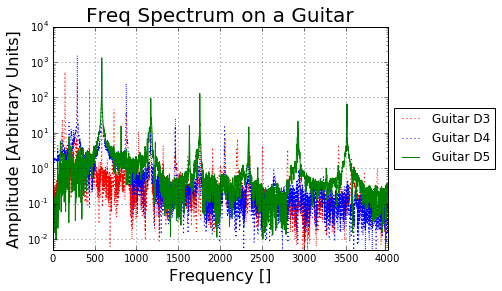

In [229]:
plt.figure()
frq_d4_p, amp_d4_p = plotSpectrum(wf_frames_d4_p,wf_d4_p.getframerate(),'r:',name="D4_Piano")
plotSpectrum(wf_frames_d5_p,wf_d4_p.getframerate(),'b:',name="D5_Piano")
plotSpectrum(wf_frames_d6_p,wf_d4_p.getframerate(),'g-',name="D6_Piano")

plt.figure()
frq_d4_f, amp_d4_f = plotSpectrum(wf_frames_d4_f,wf_d4_f.getframerate(),'r:',name="D4_Flute")
plotSpectrum(wf_frames_d5_f,wf_d4_f.getframerate(),'b:',name="D5_Flute")
plotSpectrum(wf_frames_d6_f,wf_d4_f.getframerate(),'g-',name="D6_Flute")

plt.figure()
frq_d4_g, amp_d4_g = plotSpectrum(wf_frames_d4_g,wf_d4_g.getframerate(),'r:',name="D3_Guitar")
frq_d5_g, amp_d5_g = plotSpectrum(wf_frames_d5_g,wf_d4_g.getframerate(),'b:',name="D4_Guitar")
plotSpectrum(wf_frames_d6_g,wf_d4_g.getframerate(),'g-',name="D5_Guitar")

# Cool! 
Reference for frequencies:
http://www.phy.mtu.edu/~suits/notefreqs.html

Also, it looks like the guitar is an octave lower than the piano + the flute, which I hadn't previously realized. 

Let's look at the exact harmonic pattern for one D for each instrument

In [146]:
def peak_finder(freqs,wav,thresh):
    """
    Here we scan the waveform for peaks (which indicate presence of a pop)
    Are we in a peak? If so, find + store max amp and corresponding time 
    """
    peak_t_v = [] 
    max_amp_v = []
    in_peak = False
    max_amp = -1.
    max_freq = -1.
    for i in xrange(len(wav)):
       
        if wav[i] > thresh :
            in_peak = True
            
            if wav[i] > max_amp:
                max_amp = wav[i]
                max_freq = freqs[i]
       
        if wav[i] < thresh and in_peak:
            in_peak = False
            peak_t_v.append(max_freq)
            max_amp_v.append(max_amp)
            max_amp = -1
            max_freq = -1
                
    return peak_t_v

In [147]:
f = pd.read_table('freqencies.txt',sep=' ')
df = pd.DataFrame(f,columns=['Note','Frequency','Wavelength'])

# Capital for global definitions
DEF_FREQ_V = df['Frequency']
NOTES_V = df['Note']

In [152]:
def getHarmonics(frq_v,amp_v,threshold,note='Z100',instrument='Rebab'):
    peak_freqs = peak_finder(frq_v,amp_v,threshold)
    print "For %s on %s, peaks at frequencies [Hz]: " % (note,instrument) 
    
    for p in xrange(len(peak_freqs)):
        if peak_freqs[p] == 0.: continue
        print "%.2f" % peak_freqs[p],

    harmonic_ixs = []
    for f_i in peak_freqs:
    
        if f_i == 0.: continue
        
        ix = np.argmin(np.abs( DEF_FREQ_V - f_i))
        harmonic_ixs.append(ix)
        
    print "\nThese peaks correspond to harmonics: "
    for i in harmonic_ixs:
        print NOTES_V[i],
    print "\n"
    
    return harmonic_ixs

In [164]:
_ = getHarmonics(frq_d4_p,amp_d4_p,100,'D4','piano')

# Small down sample to smooth curve -- the spectrum bounces 
# around threshold inside some peaks
frq_f = [frq_d4_f[i] for i in xrange(0,len(frq_d4_f),5)]
amp_f =  [amp_d4_f[i] for i in xrange(0,len(amp_d4_f),5)]
_ = getHarmonics(frq_f,amp_f,40,'D4','flute')

# Note the amplitude of the 4th harmonic is smaller than 
# chosen threshold for guitar D3, and so doesn't make the list
_ = getHarmonics(frq_d4_g,amp_d4_g,30,'D4','guitar')

For D4 on piano, peaks at frequencies [Hz]: 
293.05 586.59 879.64 1176.65 1473.66 1773.15 2074.61 
These peaks correspond to harmonics: 
D4 D5 A5 D6 F#6/Gb6 A6 C7 

For D4 on flute, peaks at frequencies [Hz]: 
294.53 586.59 878.65 1173.19 1465.25 1757.31 
These peaks correspond to harmonics: 
D4 D5 A5 D6 F#6/Gb6 A6 

For D4 on guitar, peaks at frequencies [Hz]: 
145.88 292.75 438.63 730.88 877.26 
These peaks correspond to harmonics: 
D3 D4 A4 F#5/Gb5 A5 



### Able to recover expected harmonic pattern from all 3 instruments!
Now let's compare the shapes of the same note across different instruments

In [230]:
# To do shape analysis, let's normalize the amplitudes of the waveforms
norm_d4_p = np.cumsum(amp_d4_p)[-1]
norm_d4_f = np.cumsum(amp_d4_f)[-1]
norm_d5_g = np.cumsum(amp_d5_g)[-1]

norm_amp_p = [ amp_d4_p[i]/norm_d4_p for i in xrange(len(amp_d4_p))]
norm_amp_f = [ amp_d4_f[i]/norm_d4_f for i in xrange(len(amp_d4_f))]
norm_amp_g = [ amp_d5_g[i]/norm_d5_g for i in xrange(len(amp_d5_g))]

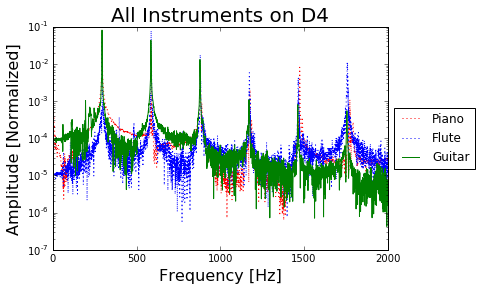

In [231]:
plt.figure()
plt.plot(frq_d4_p,norm_amp_p,'r:',label='Piano')
plt.plot(frq_d4_f,norm_amp_f,'b:',label='Flute')
plt.plot(frq_d4_g,norm_amp_g,'g-',label='Guitar')
plt.yscale('log')
plt.xlim(0,2000)
plt.ylim(1e-7,1e-1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Frequency [Hz]",fontsize=16)
plt.ylabel("Amplitude [Normalized]",fontsize=16)
plt.title("All Instruments on D4",fontsize=20)


#### All 3 instruments follow same shape (all seem to be relatively in tune with piano).  
